In [1]:
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import utils as ut
from pandas_profiling import ProfileReport

In [4]:
DATA_PATH = "../data/union/End"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final.csv")
    return pd.read_csv(csv_path)

In [5]:
df = load_data_prep()

In [6]:
df.shape

(96, 437)

In [7]:
df1 = df[ut.filtro()]

In [8]:
df1.shape

(96, 74)

In [9]:
fasc = [ 'cfpr_', 'ccbd_', 'ecpl_', 'ifol_', 'sl2l_', 'tral_', 'ufsl_', 'ufsr_' ]
lab = ['radius_of_end_region_1', 'radius_of_end_region_2', 'qa', 'iso']
borrar = []
for i in fasc:
    df1[i+'ip1_dif'] = df1[i+lab[2]]/(df1[i+lab[0]]+df1[i+lab[1]])
    df1[i+'ip2_norm'] = df1[i+lab[3]]/(df1[i+lab[2]])
for i in fasc:
    for j in lab:
        borrar.append(i+j)


In [10]:
df1.drop(borrar, axis=1, inplace=True)

In [11]:
df1.shape

(96, 58)

In [12]:
## contar si la clase esta balanceada
df1['label'].value_counts()

label
1    50
0    46
Name: count, dtype: int64

In [13]:
df1.loc[df1['label'] == 0].head()

,cod,ccbd_diameter,ccbd_mean_length,ccbd_number_of_tracts,ccbd_volume,ecpl_diameter,ecpl_mean_length,ecpl_number_of_tracts,ecpl_volume,ifol_diameter,...,ifol_ip1_dif,ifol_ip2_norm,sl2l_ip1_dif,sl2l_ip2_norm,tral_ip1_dif,tral_ip2_norm,ufsl_ip1_dif,ufsl_ip2_norm,ufsr_ip1_dif,ufsr_ip2_norm
50,sub-50004,25.4008,114.572,35906,58058.3,5.899620,95.218500,1239.000000,2602.910000,16.3114,...,0.003358,2.094344,0.002179,2.571228,0.004585,2.543903,0.003964,3.382872,0.003659,3.570838
51,sub-50005,28.9374,124.657,49382,81983.0,8.928270,105.455000,2386.000000,6602.270000,14.1946,...,0.006629,2.086375,0.005366,2.746976,0.008332,2.672437,0.011621,5.505923,0.010482,5.036197
52,sub-50006,23.9480,122.730,27264,55281.1,2.312900,75.051100,15.000000,315.327000,13.4476,...,0.009912,2.065273,0.008907,2.979565,0.026893,2.932867,0.011098,3.058008,0.010129,3.169187
53,sub-50007,23.0176,122.238,26059,50864.5,8.820666,102.646528,2836.473684,6884.019684,13.5892,...,0.003772,2.056427,0.002583,2.586940,0.003199,2.563758,0.004845,3.214906,0.004837,3.333044
54,sub-50008,29.5044,124.552,39413,85155.8,3.948840,82.439500,225.000000,1009.630000,13.5255,...,0.006047,2.199769,0.004694,2.804079,0.006012,2.740608,0.005585,3.375330,0.005567,3.939550


In [16]:
# Variable a predecir
target = 'label'

# Construcción de la matriz de features
X = df1.drop(['cod', 'label'], axis=1)

# Construcción del vector a predecir
y = df1[target].values

print('Dimensión de la matriz de features: {}'.format(X.shape))
print('Dimensión del vector a predecir: {}'.format(y.shape))

Dimensión de la matriz de features: (96, 56)
Dimensión del vector a predecir: (96,)


In [17]:
# Solo por esta vez para a fijar la semilla de numeros aleatorios
# para que se separe siempre igual cada vez que corramos esta notebook 
random_seed = 123475

# Creacion de las matrices de entrenamiento y testeo. Aca fijamos la semilla para que siempre separe igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = random_seed)

print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

Dimensión de la matriz de features para entrenamiento: (86, 56)
Dimensión de la matriz de features para testeo: (10, 56)


In [18]:
from pyod.models.knn import KNN
import pandas as pd

clf = KNN(contamination=0.18)
clf.fit(X_train)
y_pred = clf.predict(X_train)
X_train[y_pred == 1]

,ccbd_diameter,ccbd_mean_length,ccbd_number_of_tracts,ccbd_volume,ecpl_diameter,ecpl_mean_length,ecpl_number_of_tracts,ecpl_volume,ifol_diameter,ifol_mean_length,...,ifol_ip1_dif,ifol_ip2_norm,sl2l_ip1_dif,sl2l_ip2_norm,tral_ip1_dif,tral_ip2_norm,ufsl_ip1_dif,ufsl_ip2_norm,ufsr_ip1_dif,ufsr_ip2_norm
69,23.4529,114.6050,41155,49509.2,7.980220,109.876000,1458.000000,5495.690000,19.07930,178.082,...,0.009552,2.094586,0.010289,2.527550,0.011699,2.773406,0.009505,3.382064,0.010535,3.386397
4,24.6510,131.7290,44224,62869.5,8.820666,102.646528,2836.473684,6884.019684,8.30575,173.132,...,0.021328,1.964517,0.007364,2.633665,0.008536,2.677147,0.011457,2.678544,0.008610,3.247105
2,26.0740,109.9450,39403,58705.6,8.820666,102.646528,2836.473684,6884.019684,7.88520,145.187,...,0.009230,2.040639,0.004730,2.642847,0.004208,2.376092,0.008046,2.881791,0.006489,2.312317
14,19.1773,70.1557,5955,20264.1,8.820666,102.646528,2836.473684,6884.019684,4.95215,153.595,...,0.007203,2.221678,0.003417,2.739168,0.004431,2.789408,0.002873,4.823273,0.004018,3.196856
82,22.8732,131.0380,39441,53844.5,7.514770,105.826000,2123.000000,4693.670000,9.92410,141.538,...,0.016352,2.140720,0.006250,3.144629,0.018264,2.928775,0.007385,3.349951,0.007909,3.220218
72,21.6602,133.1110,43251,49049.0,10.718500,114.987000,4281.000000,10375.400000,15.81950,173.672,...,0.011616,2.087186,0.010192,2.817753,0.093219,2.630789,0.013127,3.641552,0.013736,3.791486
52,23.9480,122.7300,27264,55281.1,2.312900,75.051100,15.000000,315.327000,13.44760,173.310,...,0.009912,2.065273,0.008907,2.979565,0.026893,2.932867,0.011098,3.058008,0.010129,3.169187
65,22.4574,131.6630,37332,52152.3,8.820666,102.646528,2836.473684,6884.019684,3.93253,155.607,...,0.017210,2.401667,0.004833,2.547258,0.027755,2.691268,0.003508,3.827764,0.008490,2.820052
73,15.7594,132.4270,9837,25831.3,8.820666,102.646528,2836.473684,6884.019684,17.23690,175.283,...,0.007262,2.017279,0.007306,2.491032,0.006424,2.932007,0.007866,3.208337,0.007375,3.521056
40,26.7297,120.7680,47484,67768.8,2.774720,105.429000,45.000000,637.508000,11.69600,171.592,...,0.006375,1.963735,0.004416,2.536124,0.004969,2.584093,0.005946,3.106855,0.006274,2.634433


In [27]:
# y_train(X_train[y_pred == 1].index)

In [253]:
# borro los outliers
# indicador = X_train[y_pred == 1].index
# X_train.drop(indicador, axis=0, inplace=True)

In [28]:
print('Dimensiones de la matriz de features: {}'.format(X_train.shape))

Dimensiones de la matriz de features: (86, 56)


In [255]:
# y_train = np.delete(y_train, indicador)

In [29]:
y_train.shape

(86,)

In [30]:

std_scale = StandardScaler() # Creamos el estandarizador para usarlo posteriormente

# Ajustamos el estandarizador
std_scale.fit(X_test)
std_scale.fit(X_train)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_test_scaled = std_scale.transform(X_test)
X_scaled = std_scale.transform(X_train)

In [31]:
componentes = 20

In [32]:
# Busco una cantidad de componentes que me expliquen el 91% de la varianza y 
# usar descomposición de valor único (SVD) para calcular los vectores propios
pca = PCA(n_components=componentes, svd_solver='full')
# Ajustamos el modelo a los datos escaleados
pca.fit(X_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_pca = pca.transform(X_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

print('Dimensiones de la matriz en componentes principales: {}'.format(X_pca.shape))
print(X_scaled.shape, X_pca.shape)

Dimensiones de la matriz en componentes principales: (86, 20)
(86, 56) (86, 20)


Text(0.5, 0, 'Cantidad de componentes principales')

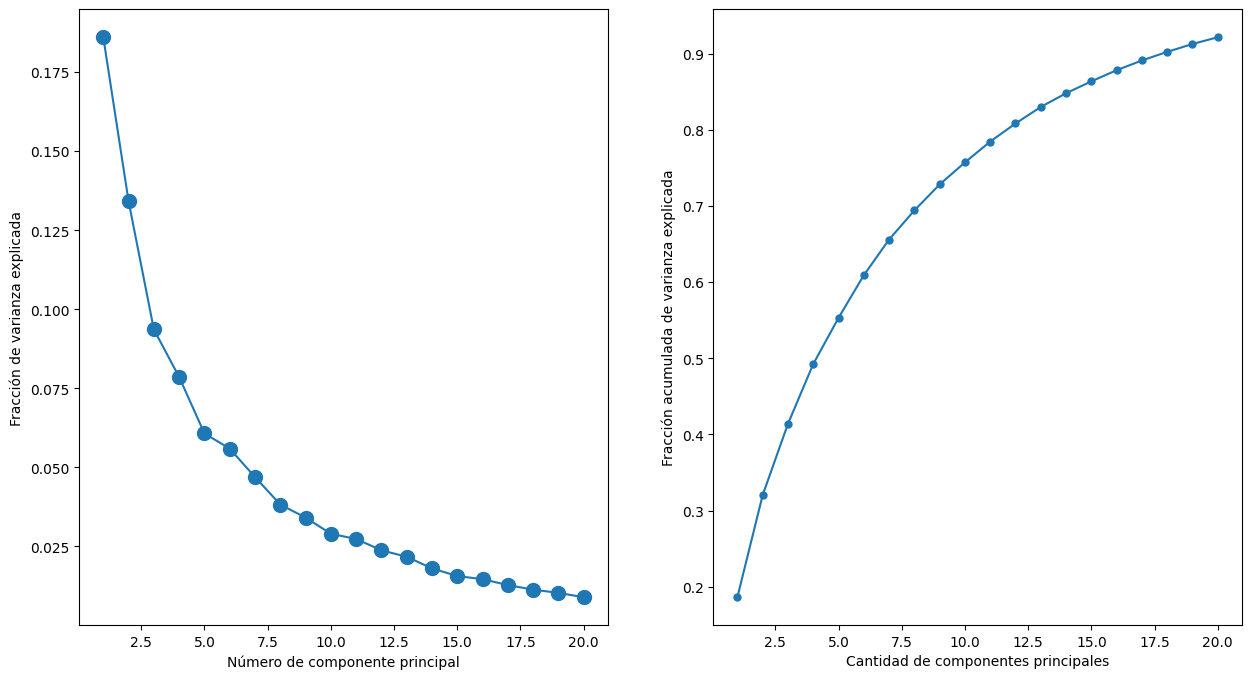

In [33]:

# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 10)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

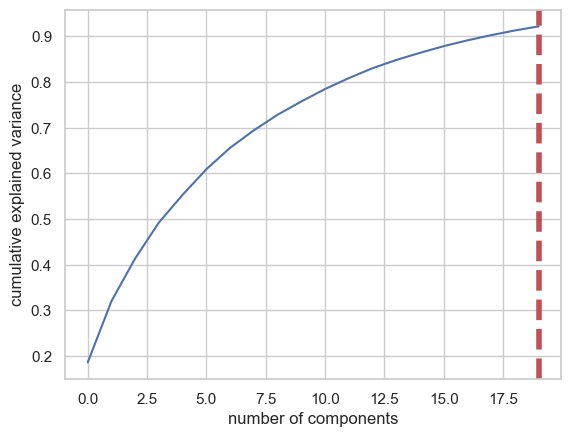

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.186053,0.186053
1,0.320234,0.134181
2,0.413846,0.093612
3,0.492440,0.078594
4,0.553171,0.060731
5,0.609093,0.055922
6,0.656037,0.046945
7,0.694282,0.038244
8,0.728392,0.034110
9,0.757402,0.029010


In [34]:
pca_test = PCA(n_components=componentes, svd_solver='full')
pca_test.fit(X_scaled)
X_train_scaled_pca = pca.transform(X_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=19, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

In [35]:
# obtenemos los features en el espacio de componentes principales
features = list(df1.drop(['cod', 'label'], axis=1).columns)
# Agregamos la información de los componentes principales a un dataframe
dfcol = pd.DataFrame(pca.components_, columns=features)

In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)

RandomForestClassifier()

In [37]:
print(classification_report(y_true=y_test,y_pred=rfc.predict(X_test_scaled_pca)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



In [38]:
def balanced_accuracy(cm): # funcion para calcular la "balanced accuracy"
  sensibilidad = cm[1,1]/(cm[1,1]+cm[0,1])
  especificidad = cm[0,0]/(cm[1,0]+cm[0,0])
  return [sensibilidad, especificidad, (sensibilidad + especificidad)/2]

In [39]:
cm = confusion_matrix(y_test, rfc.predict(X_test_scaled_pca)) 
metricas = balanced_accuracy(cm)
print('Matriz de confusion del modelo es:')
print(cm)
print('Sensibilidad del modelo es de: {}'.format(round(metricas[0],4)))  
print('Especificidad del modelo es de: {}'.format(round(metricas[1],4)))  
print('BA del modelo es de: {}'.format(round(metricas[2],4))) 

Matriz de confusion del modelo es:
[[3 2]
 [0 5]]
Sensibilidad del modelo es de: 0.7143
Especificidad del modelo es de: 1.0
BA del modelo es de: 0.8571


In [40]:
## Corremos el modelo con cross validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.901


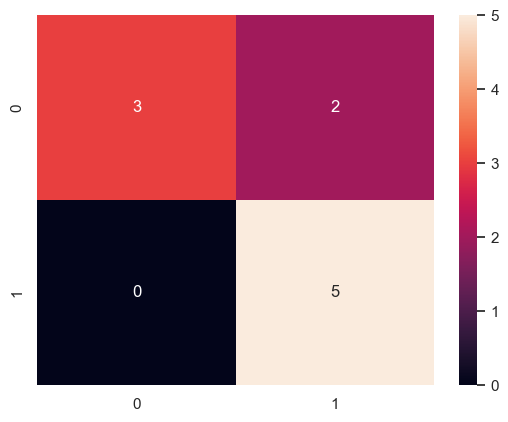

In [41]:
cf_matrix = confusion_matrix(y_test, rfc.predict(X_test_scaled_pca))
sns.heatmap(cf_matrix, annot=True);

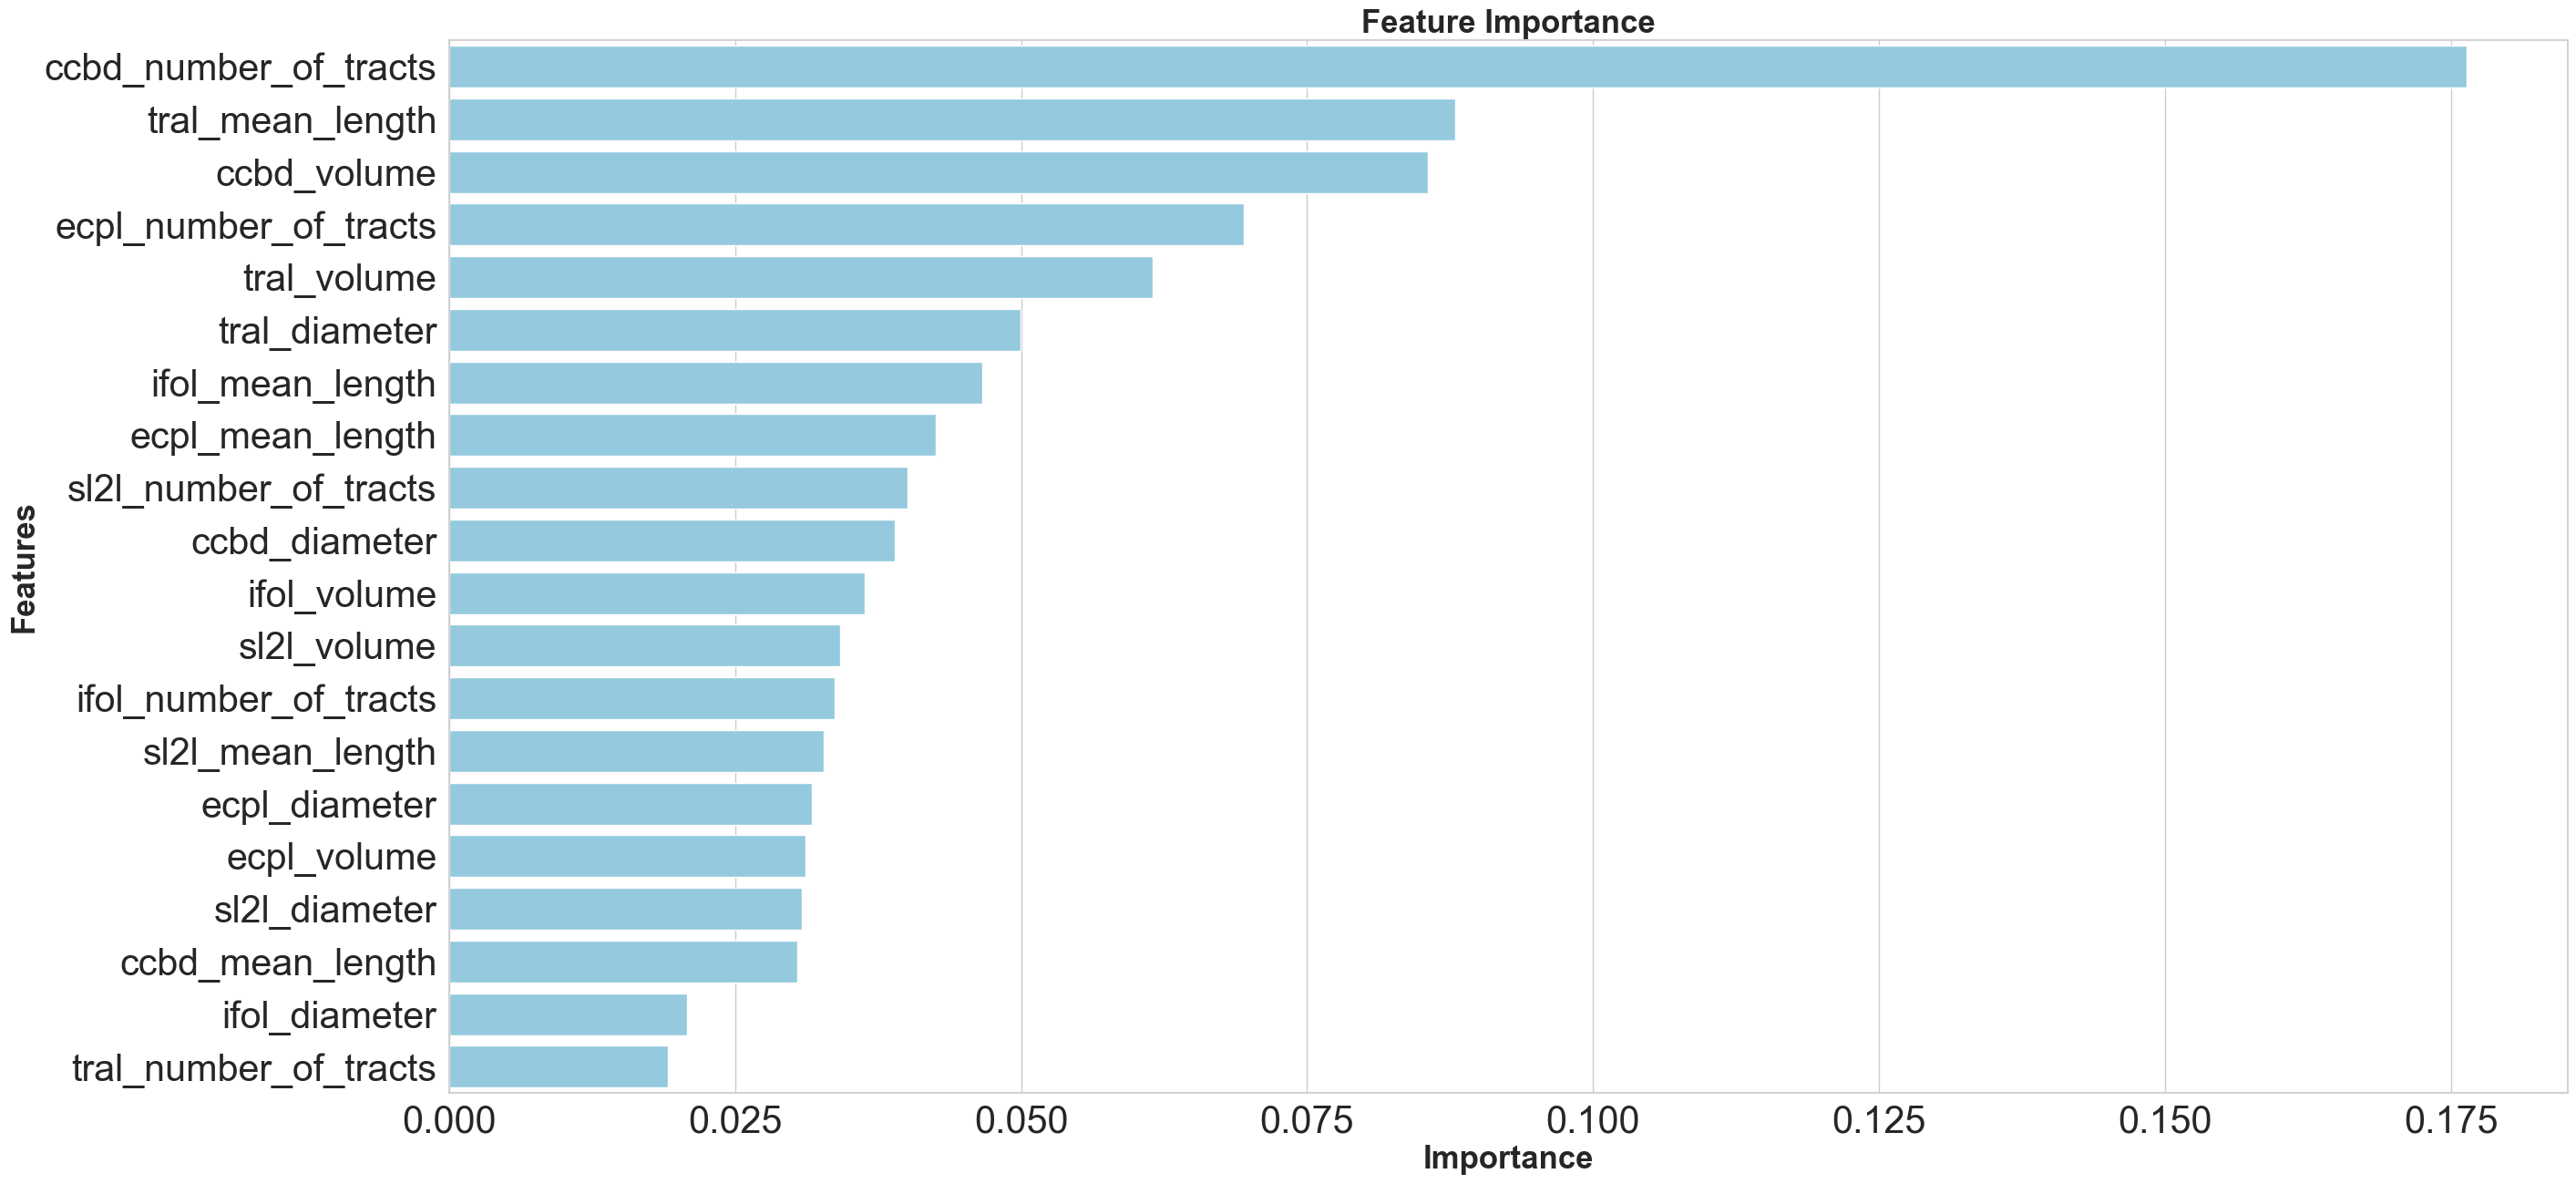

None

,Features,Gini-Importance
0,ccbd_number_of_tracts,0.176322
1,tral_mean_length,0.087910
2,ccbd_volume,0.085586
3,ecpl_number_of_tracts,0.069483
4,tral_volume,0.061476
5,tral_diameter,0.049960
6,ifol_mean_length,0.046589
7,ecpl_mean_length,0.042560
8,sl2l_number_of_tracts,0.040059
9,ccbd_diameter,0.038962


In [42]:
feats = {}
for feature, importance in zip(dfcol.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 2.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [270]:
df1.columns

Index(['cod', 'ccbd_diameter', 'ccbd_mean_length', 'ccbd_number_of_tracts',
       'ccbd_volume', 'ecpl_diameter', 'ecpl_mean_length',
       'ecpl_number_of_tracts', 'ecpl_volume', 'ifol_diameter',
       'ifol_mean_length', 'ifol_number_of_tracts', 'ifol_volume',
       'sl2l_diameter', 'sl2l_mean_length', 'sl2l_number_of_tracts',
       'sl2l_volume', 'tral_diameter', 'tral_mean_length',
       'tral_number_of_tracts', 'tral_volume', 'ufsl_diameter',
       'ufsl_mean_length', 'ufsl_number_of_tracts', 'ufsl_volume',
       'cfpr_diameter', 'cfpr_mean_length', 'cfpr_number_of_tracts',
       'cfpr_volume', 'fatr_diameter', 'fatr_iso', 'fatr_mean_length',
       'fatr_number_of_tracts', 'fatr_qa', 'fatr_radius_of_end_region_1',
       'fatr_radius_of_end_region_2', 'fatr_volume', 'ufsr_diameter',
       'ufsr_mean_length', 'ufsr_number_of_tracts', 'ufsr_volume', 'label',
       'cfpr_ip1_dif', 'cfpr_ip2_norm', 'ccbd_ip1_dif', 'ccbd_ip2_norm',
       'ecpl_ip1_dif', 'ecpl_ip2_norm', 'i